<a href="https://colab.research.google.com/github/anandhij123/GitHubTest/blob/master/P2.5%20forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [3]:
import os
print(os.listdir())

['.config', 'sample_data']


In [5]:
df = pd.read_csv('air-quality-india.csv')

In [ ]:
df.head()

Timestamp  Year  Month  Day  Hour   PM2.5
0  2017-11-07 12:00:00  2017     11    7    12   64.51
1  2017-11-07 13:00:00  2017     11    7    13   69.95
2  2017-11-07 14:00:00  2017     11    7    14   92.79
3  2017-11-07 15:00:00  2017     11    7    15  109.66
4  2017-11-07 16:00:00  2017     11    7    16  116.50

In [ ]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  36192 non-null  datetime64[ns]
 1   Year       36192 non-null  int64         
 2   Month      36192 non-null  int64         
 3   Day        36192 non-null  int64         
 4   Hour       36192 non-null  int64         
 5   PM2.5      36192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.7 MB


In [9]:
for year in [2017,2018,2019,2020,2021,2022]:
    year_df = df[df['Timestamp'].dt.year == year]
    fig = px.line(x='Timestamp',
                  y='PM2.5',
                  data_frame=year_df,
                  color='Month',
                  width=1150,
                  height=600,
                  title=f'AQI for the year {year}');
    fig.show();

In [10]:
fig = px.imshow(df.groupby(['Year', 'Month'])['PM2.5'].mean().unstack(),
                labels=dict(color="PM2.5"),
                x=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                y=[2017, 2018, 2019, 2020, 2021, 2022],
                title='Yearly AQI Trends')
fig.show()

In [13]:
df = pd.read_csv('air-quality-india.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

fig = px.scatter(df, x='Hour', y='PM2.5', color='Month',
                 facet_col='Year', facet_col_wrap=3,
                 title='Hourly AQI Variation')
fig.show()

In [14]:
fig = px.scatter_3d(df, x="Year", y="Month", z="PM2.5",
                    color="PM2.5", color_continuous_scale=["#00FF00", "#FFD700", "#FF4500", "#8A2BE2"],
                    range_color=(-45, 225))  # Range of color bar

fig.update_traces(marker=dict(size=3.5))  # Scaling down the markers
fig.update_layout(template="plotly", font=dict(family="PT Sans", size=12))  # Change template to "plotly" for white background
fig.show()

In [16]:
fig = px.scatter_3d(df, x = "Month", y = "Day", z = "PM2.5",
                    color = "PM2.5", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"],
                    range_color = (-45, 225)) # range of color bar

fig.update_traces(marker = dict(size = 2.5)) # scaling down the markers
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 12))
fig.show()
fig = px.scatter_3d(df, x = "Month", y = "Day", range_z = [0, 250], z = "PM2.5",
                    color = "PM2.5", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"],
                    animation_frame = "Hour", range_color = (-45, 225)) # range of color bar

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 12))
fig.show()
fig = px.scatter_3d(df, x = "Day", y = "Hour", z = "PM2.5",
                    color = "PM2.5", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"],
                    range_color = (-45, 225)) # range of color bar

fig.update_traces(marker = dict(size = 2.5)) # scaling down the markers
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 12))
fig.show()
fig = px.scatter_3d(df, x = "Year", y = "Day", range_z = [0,250], z = "PM2.5",
                    color = "PM2.5", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"],
                    animation_frame = "Hour", range_color = (-45, 225)) # range of color bar

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 12))
fig.show()
fig = px.scatter_3d(df, x = "Year", y = "Day", range_z = [0,250], z = "PM2.5",
                    color = "PM2.5", color_continuous_scale = ["#00FF00", "#FFC800", "#FF0000", "#B803BF"],
                    animation_frame = "Hour", range_color = (-45, 225)) # range of color bar

fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 12))
fig.show()
fig = px.histogram(df, x = "Year", y = "PM2.5", color="Month", hover_data = df.columns,
                   color_discrete_sequence = px.colors.qualitative.Set3,
                   title = "Sum of PM2.5 Distribution by Year and Month" )

fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 15))
fig.show()
fig = px.box(df, x = "Month", y = "PM2.5", points = "all", color = "Month",
             color_discrete_sequence = px.colors.qualitative.Set3,
             title = "PM2.5 Distribution by Month")

fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 20))

fig.update_traces(marker = dict(size = 0.75)) # scaling down the markers

fig.show()
# Isolate 2018-2021 to view years with data from every month

fig = px.histogram(df, x = "Month", y = "PM2.5", color = "Year", hover_data = df.columns,
                   color_discrete_sequence = px.colors.qualitative.Set3,
                   title = "Sum of PM2.5 Distribution by Month and Year" )

fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 15))
fig.show()
# Isolate 2018-2021 to view years with data from every month

fig = px.histogram(df, x = "Month", y = "PM2.5", color = "Year", hover_data = df.columns,
                   color_discrete_sequence = px.colors.qualitative.Set3,
                   title = "Sum of PM2.5 Distribution by Month and Year" )

fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 15))
fig.show()
fig = px.density_contour(df, x = "Month", y = "PM2.5", title = "PM2.5 Density by Month")

fig.update_layout(yaxis_range = [0, 115])
fig.update_layout(template = "plotly", font = dict(family = "PT Sans", size = 15))
fig.update_traces(contours_coloring = "fill", contours_showlabels = True)
fig.show()
# Here I store years 2018-2021 in a df because 2017 and 2022 does not have data from every month
df1 = df[df["Year"] > 2017]
df2 = df1[df1["Year"] < 2022]

In [18]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [19]:
# Create sequences for training and testing
seq_length = 10
train_sequences, y_train = create_sequences(train_data, seq_length)
test_sequences, y_test = create_sequences(test_data, seq_length)

# Reshape input sequences for LSTM/GRU input shape (samples, time steps, features)
X_train = train_sequences.reshape((train_sequences.shape[0], train_sequences.shape[1], 1))
X_test = test_sequences.reshape((test_sequences.shape[0], test_sequences.shape[1], 1))


In [20]:
# Function to split data into training and testing sets
def split_data(data, train_size):
    train_size = int(len(data) * train_size)
    train, test = data[0:train_size], data[train_size:]
    return train, test

In [21]:
# Load and preprocess your data
# For demonstration purposes, let's assume 'df' has 'Timestamp' and 'PM2.5' columns
# Ensure that 'Timestamp' is in datetime format and set as the index
# Also, scale the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
df['PM2.5'] = scaler.fit_transform(df[['PM2.5']])
data = df['PM2.5'].values.reshape(-1, 1)

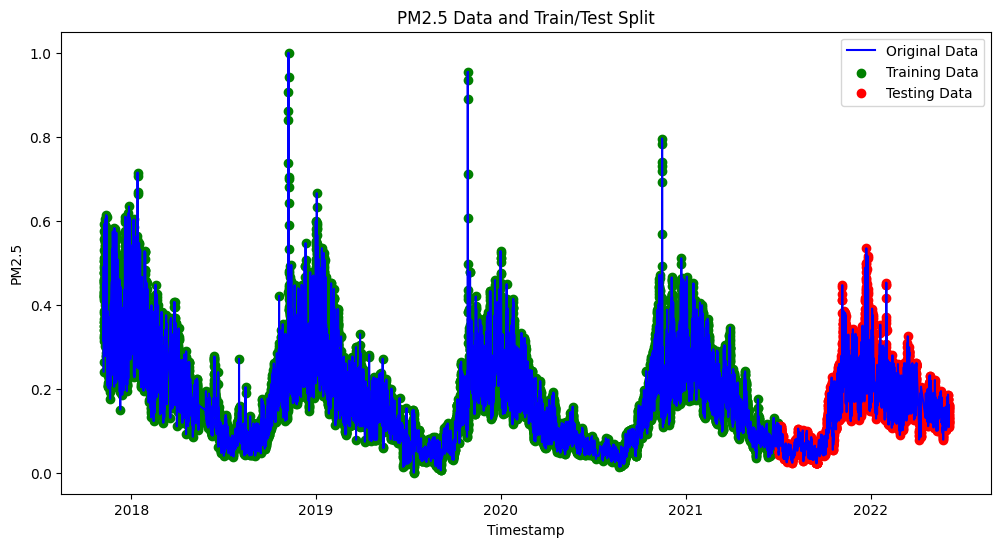

In [30]:
# Plot the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['PM2.5'], label='Original Data', color='blue')

# Plot the training data
plt.scatter(df['Timestamp'][:len(train_data)], train_data, label='Training Data', color='green')

# Plot the testing data
plt.scatter(df['Timestamp'][len(train_data):], test_data, label='Testing Data', color='red')

plt.title('PM2.5 Data and Train/Test Split')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [22]:
# Split the data into training and testing sets
train_size = 0.8
train_data, test_data = split_data(data, train_size)

In [23]:
# Create sequences for training and testing
seq_length = 10  # You can adjust this parameter based on your data
train_sequences = create_sequences(train_data, seq_length)
test_sequences = create_sequences(test_data, seq_length)


In [25]:
# Create sequences for training and testing
seq_length = 10
train_sequences, y_train = create_sequences(train_data, seq_length)
test_sequences, y_test = create_sequences(test_data, seq_length)

# Reshape input sequences for LSTM/GRU input shape (samples, time steps, features)
X_train = train_sequences.reshape((train_sequences.shape[0], train_sequences.shape[1], 1))
X_test = test_sequences.reshape((test_sequences.shape[0], test_sequences.shape[1], 1))


In [34]:
# Build and train the LSTM-GRU model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
724/724 [==============================] - 19s 22ms/step - loss: 0.0022 - val_loss: 6.6945e-04
Epoch 2/50
724/724 [==============================] - 14s 19ms/step - loss: 5.8395e-04 - val_loss: 4.7520e-04
Epoch 3/50
724/724 [==============================] - 10s 13ms/step - loss: 5.1464e-04 - val_loss: 4.6006e-04
Epoch 4/50
724/724 [==============================] - 9s 13ms/step - loss: 5.0983e-04 - val_loss: 4.5916e-04
Epoch 5/50
724/724 [==============================] - 9s 12ms/step - loss: 4.9735e-04 - val_loss: 4.8778e-04
Epoch 6/50
724/724 [==============================] - 10s 13ms/step - loss: 4.9707e-04 - val_loss: 4.9142e-04
Epoch 7/50
724/724 [==============================] - 12s 17ms/step - loss: 4.8921e-04 - val_loss: 4.3520e-04
Epoch 8/50
724/724 [==============================] - 8s 12ms/step - loss: 4.8866e-04 - val_loss: 4.8537e-04
Epoch 9/50
724/724 [==============================] - 10s 13ms/step - loss: 4.7872e-04 - val_loss: 4.3641e-04
Epoch 10/50
724/7

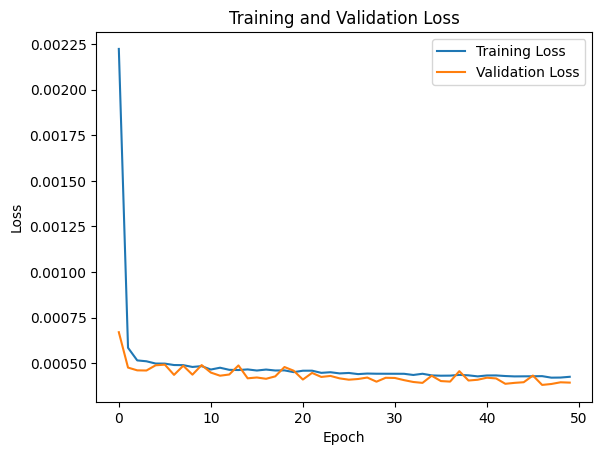

In [35]:
# Plot the train and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

226/226 [==============================] - 1s 6ms/step


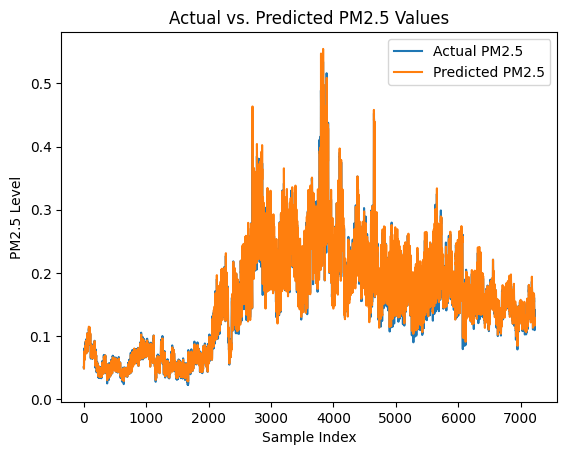

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true labels
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the Actual vs. Prediction graph
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 Values')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE): 0.014487589738594445
Mean Absolute Error (MAE): 0.008977231656244875
R-Squared (R2): 0.9692329281075142


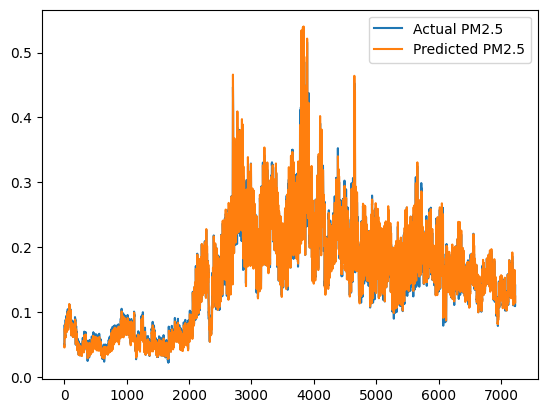

In [33]:
# Calculate RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-Squared
r2 = r2_score(y_test, y_pred)
print(f'R-Squared (R2): {r2}')

# Plot the actual vs. predicted PM2.5 values
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5')
plt.legend()
plt.show()